<a href="https://colab.research.google.com/github/afroditinats/PINNs/blob/main/adaptive%20weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded data.

Running experiment with noise: 0.0


/content/data.py:12: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  tensor_data.append(torch.tensor(entry))


Results for noise level 0.0:
  Classic PINN RMSE: 3.61431975673628e-05
  Adaptive PINN RMSE: 3.8104704964554974e-06

Running experiment with noise: 0.5
Results for noise level 0.5:
  Classic PINN RMSE: 0.0013333521938724148
  Adaptive PINN RMSE: 0.0018492920615000683

Running experiment with noise: 1
Results for noise level 1:
  Classic PINN RMSE: 0.0037069306071818263
  Adaptive PINN RMSE: 0.006188486370414057

Running experiment with noise: 5
Results for noise level 5:
  Classic PINN RMSE: 0.052847446857573706
  Adaptive PINN RMSE: 0.07817306797960331

Running experiment with noise: 10
Results for noise level 10:
  Classic PINN RMSE: 0.17106821883828147
  Adaptive PINN RMSE: 0.23468963039502921


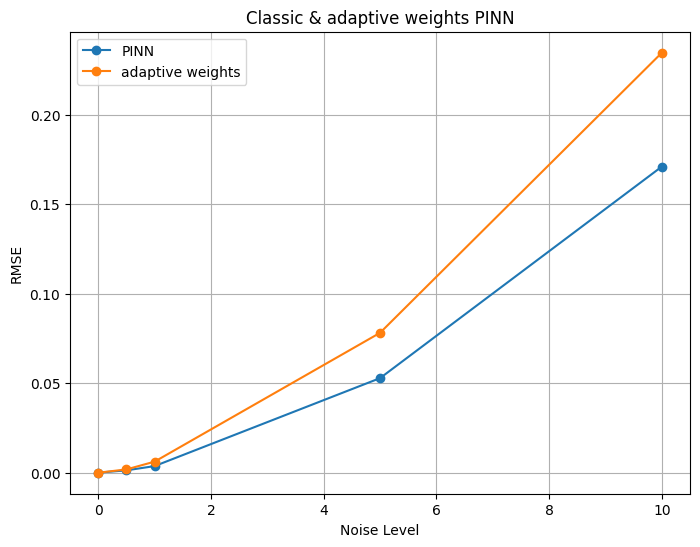

In [2]:
from data import get_data, prepare_tensor, add_noise
import modules as classic
import modules_adaptive as adaptive
from sklearn.metrics import mean_squared_error
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd

data = get_data()
data_tensor = prepare_tensor(data)
(x_test, y_test, x_train, y_train, x_bc, y_bc, x_ic, y_ic, x_val, y_val, pde_x, _) = data_tensor

noise_levels = [0.0, 0.5,1,5,10]
rmse_results = {"Classic PINN": [], "Adaptive PINN": []}

for noise in noise_levels:
    print(f"\nRunning experiment with noise: {noise}")
    y_train_noise, y_val_noise = add_noise([y_train, y_val], noise_level=noise)

    classic_PINN = classic.Model()
    classic_PINN.train_model([x_bc, y_bc], [x_ic, y_ic], [x_train, y_train_noise], [x_val, y_val_noise], pde_x, iterations=2000)
    pred_classic = classic_PINN.forward(x_test)
    rmse_classic = mean_squared_error(pred_classic.detach().numpy(), y_test.numpy())
    rmse_results["Classic PINN"].append(rmse_classic)

    adaptive_PINN = adaptive.Model()
    adaptive_PINN.train_model([x_bc, y_bc], [x_ic, y_ic], [x_train, y_train_noise], [x_val, y_val_noise], pde_x, iterations=2000)
    pred_adaptive = adaptive_PINN.forward(x_test)
    rmse_adaptive = mean_squared_error(pred_adaptive.detach().numpy(), y_test.numpy())
    rmse_results["Adaptive PINN"].append(rmse_adaptive)

    print(f"Results for noise level {noise}:")
    print(f"  Classic PINN RMSE: {rmse_classic}")
    print(f"  Adaptive PINN RMSE: {rmse_adaptive}")

plt.figure(figsize=(8, 6))
plt.plot(noise_levels, rmse_results["Classic PINN"], marker='o', linestyle='-', label="PINN")
plt.plot(noise_levels, rmse_results["Adaptive PINN"], marker='o', linestyle='-', label="adaptive weights")
plt.xlabel("Noise Level")
plt.ylabel("RMSE")
plt.title("Classic & adaptive weights PINN")
plt.legend()
plt.grid(True)
plt.show()



In [5]:
df = pd.DataFrame(rmse_results)

print(df)

   Classic PINN  Adaptive PINN
0      0.000036       0.000004
1      0.001333       0.001849
2      0.003707       0.006188
3      0.052847       0.078173
4      0.171068       0.234690


In [8]:

df = pd.DataFrame(rmse_results, index=noise_levels)
df.index.name = "Noise Level"
print(df.to_string())

             Classic PINN (LR=0.1)  Classic PINN (LR=1)  Classic PINN (LR=10)  Adaptive PINN (LR=0.1)  Adaptive PINN (LR=1)  Adaptive PINN (LR=10)
Noise Level                                                                                                                                       
0.0                       0.000074             0.377464              0.377464                0.377418              0.000059               0.377419
0.5                       0.002561             0.377465              0.377465                0.002324              0.377415               0.377415
1.0                       0.011552             0.377411              0.377411                0.372509              0.377550               0.377584
5.0                       0.059551             0.021821              0.378099                0.378885              0.378866               0.379191
10.0                      0.034305             0.387502              0.387502                0.408739              0.4